## Tutorial

This guide can help you start working with NetworkX.

### Creating a graph

Create an empty graph with no nodes and no edges.

1. Узлы
2. Грани
3. Изучение элементов графа
4. Удаление элементов из графа
5. Использование конструкторов графов
6. Что использовать в качестве узлов и ребер
7. Доступ к ребрам и соседям
8. Добавление атрибутов к графам, узлам и ребрам
9. Направленные графы
10. Мультиграфы
11. Генераторы графов и операции над графами
12. Анализ графов
13. Рисование графов
14. NX-Guides

In [1]:
import networkx as nx
G = nx.Graph()

# 1. Узлы

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object e.g., a text string, an image, an XML object,
another Graph, a customized node object, etc.

По определению, `граф` - это набор узлов (вершин) вместе с
идентифицированными парами узлов (называемых ребрами, связями и т.д.). В сети узлы могут
быть любыми [хэшируемыми](https://docs.python.org/3/glossary.html#term-hashtable ) объект, например, тестовая строка, изображение, XML-объект,
другой график, настроенный объект узла и т.д.

# Nodes

The graph `G` can be grown in several ways.  NetworkX includes many
graph generator functions and
facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations.  You can add one node
at a time,

Граф `G` может быть увеличен несколькими способами. Сеть включает в себя множество
функций генератора графиков и
средств для чтения и записи графиков во многих форматах.
Однако для начала мы рассмотрим простые манипуляции. Вы можете добавлять по одному узлу
за раз,

In [2]:
G.add_node(1)

or add nodes from any [iterable](https://docs.python.org/3/glossary.html#term-iterable) container, such as a list

или добавьте узлы из любого [iterable](https://docs.python.org/3/glossary.html#term-iterable ) контейнера, например список

In [3]:
G.add_nodes_from([2, 3])

You can also add nodes along with node
attributes if your container yields 2-tuples of the form
`(node, node_attribute_dict)`:

Вы также можете добавлять узлы вместе с
атрибутами узла, если ваш контейнер выдает 2 кортежа вида
`(узел, node_attribute_dict)`:

```
>>> G.add_nodes_from([
...     (4, {"color": "red"}),
...     (5, {"color": "green"}),
... ])
```

Node attributes are discussed further below.
Nodes from one graph can be incorporated into another:

Атрибуты узла подробно обсуждаются ниже.
Узлы из одного графика могут быть включены в другой:

In [4]:
H = nx.path_graph(10)
G.add_nodes_from(H)

`G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

`G` теперь содержит узлы `H` как узлы `G`.
Напротив, вы могли бы использовать график "H" в качестве узла в `G`.

In [5]:
G.add_node(H)

The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.

Граф `G` теперь содержит `H` в качестве узла. Эта гибкость очень мощна, поскольку
позволяет создавать графики графиков, графики файлов, графики функций и многое другое.
Стоит подумать о том, как структурировать ваше приложение таким образом, чтобы узлы
были полезными объектами. Конечно, вы всегда можете использовать уникальный идентификатор в `G`
и иметь отдельный словарь, привязанный по идентификатору к информации об узле, если
предпочитаете.

# 2. Edges - Ребра - Края

`G` can also be grown by adding one edge at a time,

`G` также можно увеличить, добавляя по одному узлу за раз,

In [6]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

путем добавления списка ребер,

In [7]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further
below.

или добавив несколько ребер. *ebunch* - это любой итерируемый
контейнер реберных кортежей. Граничный кортеж может быть 2-мя кортежами узлов или 3-мя кортежами
с 2 узлами, за которыми следует словарь атрибутов края, например,
`(2, 3, {'вес': 3,1415})`. Атрибуты ребер
подробно обсуждаются ниже.

In [8]:
G.add_edges_from(H.edges)

There are no complaints when adding existing nodes or edges. For example,
after removing all nodes and edges,

При добавлении существующих узлов или ребер претензий нет. Например,
после удаления всех узлов и ребер,

In [9]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are
already present.

мы добавляем новые узлы / ребра, и сеть спокойно игнорирует все, что уже присутствует.

In [10]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

На данном этапе граф `G` состоит из 8 узлов и 3 ребер, как видно из:

In [11]:
G.number_of_nodes()
G.number_of_edges()

3

In [12]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
# assert list(DG.successors(2)) == [1, 3]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

Оператор `assert` - это утверждение, которое используется для проверки того, что определенное условие истинно. Если условие является ложным, то оператор вызовет исключение AssertionError.

В контексте приведенного кода, оператор `assert` проверяет, что список преемников (`successors`) вершины 2 в графе `DG` равен `[1, 4]`. Если это условие не выполняется, то возникнет исключение `AssertionError`, что может помочь обнаружить ошибки в программе.

`assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]`
Этот код использует оператор `assert` для проверки того, что список ребер в графе `DG` соответствует ожидаемому списку ребер, заданному в правой части выражения. Если проверка не проходит, то возникает ошибка `AssertionError`.

В данном случае, проверяется соответствие ожидаемому списку ребер `[(2, 1), (2, 4), (1, 3), (1, 2)]` в графе `DG`.

# Examining elements of a graph

# 3. Изучение элементов графика

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (`adjacencies`), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data()`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

Мы можем исследовать узлы и ребра. Четыре основных свойства графа облегчают
составление отчетов: `G.nodes`, `G.edges`, `G.adj` и `G.degree`.. Это
множество-подобные представления `узлов`, `ребер`, `соседей` (смежностей) и `степеней
узлов` в графе. Они предлагают постоянно обновляемый доступ к
структуре графика, доступный только для чтения. Они также похожи на dict в том смысле, что вы можете искать
атрибуты данных узла и ребра с помощью представлений и выполнять итерации с атрибутами данных
, используя методы `.items()`, `.data()`.
Если вам нужен определенный тип контейнера вместо представления, вы можете указать его.
Здесь мы используем списки, хотя наборы, `dicts`, кортежи и другие контейнеры могут быть
лучше в других контекстах

In [13]:
list(G.nodes)
list(G.edges)
print(list(G.adj[1]))  # or list(G.neighbors(1))
print(G.degree[1])  # the number of edges incident to 1

print(list(G.adj[2]))  # or list(G.neighbors(1))
print(G.degree[2])  # the number of edges incident to 1

[2, 3]
2
[1]
1


One can specify to report the edges and degree from a subset of all nodes
using an nbunch. An *nbunch* is any of: `None` (meaning all nodes),
a node, or an iterable container of nodes that is not itself a node in the
graph.

Можно сообщать о ребрах и степени из подмножества всех узлов
, используя связку. *nbunch* - это любой из: `None` (имеется в виду все узлы),
узел или повторяющийся контейнер узлов, который сам по себе не является узлом в
графе.

In [14]:
G.edges([2, 'm'])
G.degree([2, 3, 1])  

DegreeView({2: 1, 3: 2, 1: 2})

Степень вершины в графе `degree` - это количество ребер, связывающих данную вершину с другими вершинами графа.

# Removing elements from a graph

# 4. Удаление элементов из графика

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

Можно удалить узлы и ребра из графика аналогично добавлению.
Методы использования
`Graph.remove_node()`

`Graph.remove_nodes_from()`

`Graph.remove_edge()`
и

`Graph.remove_edges_from()`, например

In [15]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)

# Using the graph constructors

# 5. Использование графовых конструкторов

Graph objects do not have to be built up incrementally - data specifying
graph structure can be passed directly to the constructors of the various
graph classes.
When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.


Объекты графа не обязательно создавать постепенно - данные, определяющие
структуру графа, могут быть переданы непосредственно конструкторам различных
классов графа.
При создании структуры графа путем создания экземпляра одного из
классов графа вы можете указать данные в нескольких форматах.

In [16]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # создайте орграф, используя соединения из G
list(H.edges())
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 3)} # adjacency - смежность
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2), (2, 3)]

# What to use as nodes and edges

# 6. Что использовать в качестве узлов и ребер

You might notice that nodes and edges are not specified as NetworkX
objects.  This leaves you free to use meaningful items as nodes and
edges. The most common choices are numbers or strings, but a node can
be any hashable object (except `None`), and an edge can be associated
with any object `x` using `G.add_edge(n1, n2, object=x)`.

As an example, `n1` and `n2` could be protein objects from the RCSB Protein
Data Bank, and `x` could refer to an XML record of publications detailing
experimental observations of their interaction.

We have found this power quite useful, but its abuse
can lead to surprising behavior unless one is familiar with Python.
If in doubt, consider using `convert_node_labels_to_integers()` to obtain
a more traditional graph with integer labels.

Вы можете заметить, что узлы и ребра не указаны в качестве сетевых
объектов. Это позволяет вам свободно использовать значимые элементы в качестве узлов и
ребер. Наиболее распространенными вариантами являются числа или строки, но узлом может
быть любой хэшируемый объект (кроме `None`), а ребро может быть связано
с любым объектом `x` с помощью `G.add_edge(n1, n2, object=x)`.

В качестве примера, `n1` и `n2` могут быть белковыми объектами из RCSB Protein
Банк данных, а "x" может относиться к XML-записи публикаций с подробным
описанием экспериментальных наблюдений за их взаимодействием.

Мы нашли эту возможность весьма полезной, но злоупотребление
ею может привести к неожиданному поведению, если вы не знакомы с Python.
Если вы сомневаетесь, рассмотрите возможность использования `convert_node_labels_to_integers()` для получения
более традиционного графика с целочисленными метками.

# Accessing edges and neighbors

# 7. Доступ к ребрам и соседям

In addition to the views `Graph.edges`, and `Graph.adj`,
access to edges and neighbors is possible using subscript notation.

В дополнение к представлениям `Graph.edges` и `Graph.adj`
доступ к ребрам и соседям возможен с использованием индексной записи.

In [17]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # то же, что и G.adj[1]
G[1][2] # G.edges[1, 2]

{'color': 'yellow'}

You can get/set the attributes of an edge using subscript notation
if the edge already exists.

Вы можете получить / установить атрибуты ребра, используя подстрочные обозначения, если ребро уже существует.

In [18]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

Быстрый просмотр всех пар (узел, смежность) достигается с помощью
`G.adjacency()` или `G.adj.items()`.
Обратите внимание, что для неориентированных графов итерация смежности просматривает каждое ребро дважды.

In [19]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

Удобный доступ ко всем ребрам достигается с
помощью свойства edges

In [20]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

# 8. Добавление атрибутов к графам, узлам и ребрам

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

Такие атрибуты, как веса, метки, цвета или любой другой объект Python, который вам нравится,
могут быть прикреплены к графикам, узлам или ребрам.

Каждый граф, узел и ребро могут содержать пары атрибутов ключ/значение в соответствующем
словаре атрибутов (ключи должны быть хэшируемыми). По умолчанию они пусты,
но атрибуты могут быть добавлены или изменены с помощью `add_edge`, `add_node` или прямого
обращения к словарям атрибутов с именами `G.graph`, `G.nodes` и
`G.edge` для графика `G`.

## Graph attributes

## 8.1. Атрибуты графa

Assign graph attributes when creating a new graph

Назначайте атрибуты графу при создании нового графа

In [21]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

Или вы можете изменить атрибуты позже

In [22]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

# Node attributes
# 8.2. Атрибуты узла

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

Добавьте атрибуты узла, используя 

`add_node()` 

`add_nodes_from()` 

`G.nodes`

In [23]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Note that adding a node to `G.nodes` does not add it to the graph, use
`G.add_node()` to add new nodes. Similarly for edges.

# Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

Обратите внимание, что добавление узла в `G.nodes` не добавляет его в граф, используйте
`G.add_node()` для добавления новых узлов. Аналогично для ребер.

# 8.3. Атрибуты ребер

Добавляйте/изменяйте атрибуты ребер, используя 

`add_edge()` 

`add_edges_from()`

или подстрочные обозначения.

In [24]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.edges[4, 5]['color'], G[3][4]['weight'])

red 4.2


The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.

 # Directed graphs

The `DiGraph` class provides additional methods and properties specific
to directed edges, e.g.,
`DiGraph.out_edges`, `DiGraph.in_degree`,
`DiGraph.predecessors`, `DiGraph.successors` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors` is equivalent to
`successors` while `degree` reports the sum
of `in_degree` and `out_degree` even though that may feel inconsistent at times.

Специальный атрибут `weight` должен быть числовым, поскольку он используется
алгоритмами, требующими взвешенных ребер.

# 9. Направленные графы

Класс `DiGraph` предоставляет дополнительные методы и свойства, специфичные
для направленных ребер, например,
`DiGraph.out_edges`, `DiGraph.in_degree`,
`DiGraph.predecessors`, `DiGraph.successors` и т.д.
Чтобы алгоритмы могли легко работать с обоими классами, направленные версии
`соседей` эквивалентны
`преемникам`, в то время как `степень` сообщает сумму
`in_degree` и `out_degree`, хотя иногда это может показаться непоследовательным.


 out_degree(2) - количество исходящих ребер вершины 2: 2 
 in_degree(2) - Входящие ребра вершины 2:  1 
 out_degree(2, weight='weight') - Выдал общий исходящий из вершины вес:  0.8 
 in_degree(2, weight='weight') - Входящий вес вершины 2:  0.5 
 out_degree(weight='weight') - Список кортежей состоящий из вершин и исходящих весов:  [(1, 0.5), (2, 0.8), (3, 0.75), (4, 0), (5, 0)] 
 in_degree(weight='weight') - Список кортежей из вершин и входящих весов:  [(1, 0.75), (2, 0.5), (3, 0), (4, 0.45), (5, 0.35)] 
 DG.degree(), -  Список всех соседств в графе:  [(1, 2), (2, 3), (3, 1), (4, 1), (5, 1)] 
 DG.degree(2), - Число соседей вершины:  3 
 DG.degree(weight='weight') -  Cуммарный вход-й и исход-й вес для каждой вершины графа:  [(1, 1.25), (2, 1.3), (3, 0.75), (4, 0.45), (5, 0.35)] 
 DG.degree(2,weight='weight') -  Сумарный вход-й и исход-й вес вершины 2:  1.3

 [4, 5] 
 [4, 5]


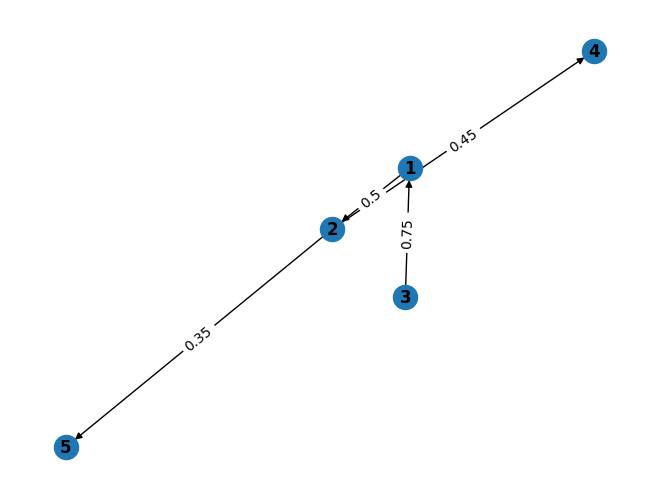

In [25]:
import matplotlib.pyplot as plt

DG = nx.DiGraph()
DG.add_weighted_edges_from(
    [(1, 2, 0.5), (3, 1, 0.75), (2, 4, 0.45), (2, 5, 0.35)])

print(
    '\n', "out_degree(2) - количество исходящих ребер вершины 2:",
    DG.out_degree(2),  
    '\n', "in_degree(2) - Входящие ребра вершины 2: ",
    DG.in_degree(2),  
    '\n', "out_degree(2, weight='weight') - Выдал общий исходящий из вершины вес: ",
    DG.out_degree(2, weight='weight'),  
    '\n', "in_degree(2, weight='weight') - Входящий вес вершины 2: ",
    DG.in_degree(2, weight='weight'),  
    '\n', "out_degree(weight='weight') - Список кортежей состоящий из вершин и исходящих весов: ",
    DG.out_degree(weight='weight'),  
    '\n',"in_degree(weight='weight') - Список кортежей из вершин и входящих весов: ",
    DG.in_degree(weight='weight'),  
    '\n',
    'DG.degree(), -  Список всех соседств в графе: ',
    DG.degree(), 
    '\n',
    'DG.degree(2), - Число соседей вершины: ',
    DG.degree(2), 
    '\n',
    "DG.degree(weight='weight') -  Cуммарный вход-й и исход-й вес для каждой вершины графа: ",
    DG.degree(weight='weight'),
    '\n',
    "DG.degree(2,weight='weight') -  Сумарный вход-й и исход-й вес вершины 2: ",
    DG.degree(2,weight='weight')
)

print(
    '\n',
    list(DG.successors(2)), # Кто преемник вершины 2
    '\n',
    list(DG.neighbors(2))) # Кто сосед вершины 2

pos = nx.spring_layout(DG)
nx.draw(DG, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(DG,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


Some algorithms work only for directed graphs and others are not well
defined for directed graphs.  Indeed the tendency to lump directed
and undirected graphs together is dangerous.  If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

Некоторые алгоритмы работают только для ориентированных графов, а другие недостаточно четко
определены для ориентированных графов. Действительно, тенденция смешивать направленные
и неориентированные графы вместе опасна. Если вы хотите рассматривать
ориентированный граф как неориентированный для какого-либо измерения, вам, вероятно, следует
преобразовать его с помощью `Graph.to_undirected()` или с помощью

In [26]:
H = nx.Graph(G)  # создание неориентированного графа H из ориентированного графа G

# Multigraphs

NetworkX provides classes for graphs which allow multiple edges
between any pair of nodes.  The `MultiGraph` and
`MultiDiGraph`
classes allow you to add the same edge twice, possibly with different
edge data.  This can be powerful for some applications, but many
algorithms are not well defined on such graphs.
Where results are well defined,
e.g., `MultiGraph.degree()` we provide the function.  Otherwise you
should convert to a standard graph in a way that makes the measurement
well defined.

# 10. Мультиграфы

Мультиграф (англ. multigraph) - это математический термин, который описывает граф, в котором две вершины могут быть соединены несколькими ребрами (в отличие от обычного графа, где между вершинами может быть только одно ребро).

NetworkX предоставляет классы для графиков, которые допускают множество ребер
между любой парой узлов. `MultiGraph` и
`MultiDiGraph`
классы позволяют вам добавлять одно и то же ребро дважды, возможно, с разными
данными ребра. Это может быть полезно для некоторых приложений, но многие
алгоритмы недостаточно четко определены на таких графиках.
Там, где результаты четко определены,
например, `MultiGraph.degree()`, мы предоставляем функцию. В противном случае вам
следует преобразовать в стандартный граф таким образом, чтобы измерение
было четко определено.


In [27]:
MG = nx.MultiGraph()
# Добавление ребер с весом
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(MG.degree(weight='weight'), '\n', dict(MG.degree(weight='weight')))
GG = nx.Graph()  # Создание графа
for n, nbrs in MG.adjacency(): # цикл для 1й вершины
# Выдаст словарь {1: {2: {0: {'weight': 0.5}, 1: {'weight': 0.75}}}} 
# тут путь, где 1 - исходная вершина. 2 - конечная вершина 0 - первый путь с весом 0.5, 1 - вторй путь с весом 0.75
# n вершина, 1 к примеру, nrbs для вершины 1 - {2: {0: {'weight': 0.5}, 1: {'weight': 0.75}}}
    for nbr, edict in nbrs.items(): # цикл для вершины-соседа, для вершины-1 сосед вершина-2
    # edict - {0: {'weight': 0.5}, 1: {'weight': 0.75}}, nrb - вершина-сосед 
        minvalue = min([d['weight'] for d in edict.values()]) # возвращает минимиальный вес из весов двух путей
        GG.add_edge(n, nbr, weight=minvalue) # Добаляет в GG путь от вершины n до вершины nrb с весом minvalue
print("(GG.degree(weight='weight') - ", GG.degree(weight='weight'))
nx.shortest_path(GG, 1, 3)


[(1, 1.25), (2, 1.75), (3, 0.5)] 
 {1: 1.25, 2: 1.75, 3: 0.5}
(GG.degree(weight='weight') -  [(1, 0.5), (2, 1.0), (3, 0.5)]


[1, 2, 3]

# Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

## 1. Applying classic graph operations, such as:

## 2. Using a call to one of the classic small graphs, e.g.,

## 3. Using a (constructive) generator for a classic graph, e.g.,

like so:

# 11. Генераторы графов и операции над графами

В дополнение к построению графов по узлам или по ребрам, они
также могут быть сгенерированы

## 11.1. Применяя классические операции над графами, такие как:
`subgraph(G, nbunch)`                    Возвращает подграф, индуцированный на узлах в nbunch.
       
`union(G, H[, rename])`                  Объединить графы G и H.

`disjoint_union(G, H)  `                 Объединить графы G и H.

`cartesian_product(G, H)`                Возвращает декартово произведение графов G и H.

`compose(G, H)           `               Составляет граф G и H, объединяя узлы и ребра в один граф.

`complement(G)            `              Возвращает дополнение графа G.

*Дополнение графа - это новый граф, который строится на основе исходного графа и содержит все вершины, которые были в исходном графе, но не содержит ребра, которые были в исходном графе.*

*Формально, если дан неориентированный граф G с n вершинами и m ребрами, то дополнение графа G, обозначаемое как G', это граф с тем же набором вершин, что и в G, но без ребер, которые присутствуют в G. То есть, если (u, v) не является ребром в G, то (u, v) является ребром в G', и наоборот.*

`create_empty_copy(G[, with_data]) `     Возвращает копию графа G со всеми удаленными ребрами.

`to_undirected(graph)               `    Возвращает неориентированное представление графа .graph

`to_directed(graph)                  `   Возвращает направленное представление графа .graph

## 11.2. Используя обращение к одному из классических малых графов, например,

`petersen_graph([create_using]) `           Возвращает график Петерсена.

`tutte_graph([create_using]) `              Возвращает граф Тутте.

`sedgewick_maze_graph([create_using]) `     Возвращает небольшой лабиринт с циклом.

`tetrahedral_graph([create_using]) `        Возвращает 3-регулярный тетраэдрический граф Платона.

## 11.3. Использование (конструктивного) генератора для классического графа, например,
`complete_graph(n[, create_using]) `                    Возвращает полный граф с узлами.K_n

`complete_bipartite_graph(n1, n2[, create_using]) `     Возвращает полный двудольный граф .K_{n_1,n_2}

`barbell_graph(m1, m2[, create_using]) `                Возвращает двудольный граф: два полных графа co

`lollipop_graph(m, n[, create_using]) `                 Возвращает леденцовый граф; соединен с .K_mP_n

например:

In [28]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

# 11.4. Using a stochastic graph generator, e.g,

like so:

# 11.4. Используя генератор стохастических графов, напр,

например:

In [29]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

# 12. Reading a graph stored in a file using common graph formats

NetworkX supports many popular formats, such as edge lists, adjacency lists,
GML, GraphML, LEDA and others.

# 12. Чтение графа, хранящегося в файле, с использованием распространенных форматов графов

NetworkX поддерживает множество популярных форматов, таких как списки ребер, списки смежности,
GML, GraphML, LEDA и другие.

In [30]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

For details on graph formats see Reading and writing graphs
and for graph generator functions see Graph generators

 Analyzing graphs

The structure of `G` can be analyzed using various graph-theoretic
functions such as:

Подробнее о форматах графов см. в разделе Чтение и запись графиков
и о функциях генераторов графиков см. раздел Генераторы графов

 Анализ графов

Структура `G` может быть проанализирована с помощью различных графо-теоретических функций, такие как:

In [31]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
print(list(nx.connected_components(G))) # Компонент ысвязности
sorted(d for n, d in G.degree())
nx.clustering(G) # используется для вычисления коэффициентов кластеризации для каждой вершины в графе `G`.

[{1, 2, 3}, {'spam'}]


{1: 0, 2: 0, 3: 0, 'spam': 0}

Функция `nx.clustering(G)` из библиотеки NetworkX используется для вычисления коэффициентов кластеризации для каждой вершины в графе `G`.

Коэффициент кластеризации для вершины - это мера того, насколько близки ее соседи друг к другу. Он вычисляется как отношение количества ребер, которые существуют между соседями данной вершины, к максимальному количеству ребер, которые могут существовать между ними. Этот коэффициент может быть использован для изучения локальной структуры графа и может помочь выявить характерные особенности, такие как кластеризация, ассортативность, центральность и т.д.

Some functions with large output iterate over (node, value) 2-tuples.
These are easily stored in a [dict](https://docs.python.org/3/library/stdtypes.html#dict) structure if you desire.

Некоторые функции с большим выводом выполняют итерации над 2-кортежами (узел, значение).
При желании их легко хранить в структуре [dict](https://docs.python.org/3/library/stdtypes.html#dict).

In [32]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3] 

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

Подробную информацию о поддерживаемых алгоритмах графов см. в разделе Алгоритмы
поддерживается.

# 13. Рисование графов

NetworkX не является в первую очередь пакетом для рисования графов, но базовое рисование с помощью
Matplotlib, а также интерфейс для использования программного пакета Graphviz с открытым исходным кодом.
включены в пакет.  Они являются частью модуля networkx.drawing
и будут импортированы, если это возможно.

Сначала импортируйте интерфейс построения графиков Matplotlib (pylab тоже работает)

Переведено с помощью www.DeepL.com/Translator (бесплатная версия)

See Algorithms for details on graph algorithms
supported.

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the networkx.drawing
module and will be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [33]:
import matplotlib.pyplot as plt

To test if the import of `nx_pylab` was successful draw `G`
using one of

Чтобы проверить, был ли импорт `nx_pylab` успешным, нарисуйте `G`
используя один из

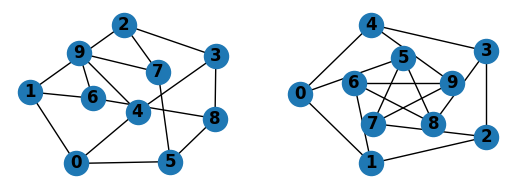

In [34]:
G = nx.petersen_graph() # создается граф Петерсена с помощью функции 
subax1 = plt.subplot(2,2,1) # создаются две субграфики (subplot) в одной строке
nx.draw(G, with_labels=True, font_weight='bold') # with_labels=True говорит библиотеке отображать номера узлов на графе. font_weight='bold' используется для увеличения жирности шрифта номеров узлов.
subax2 = plt.subplot(222)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold') 
# Аргумент nlist в nx.draw_shell() задает порядок слоев узлов графа. 
# В этом конкретном примере, nlist установлен так, чтобы первый слой состоял из узлов 5-9, а второй слой состоял из узлов 0-4. 
# Этот порядок узлов отображается на графике, где узлы находятся в двух кругах с центром в середине.

when drawing to an interactive display.  Note that you may need to issue a
Matplotlib

при рисовании на интерактивном дисплее.  Обратите внимание, что вам может потребоваться выдать команду
Matplotlib

In [35]:
plt.show()

command if you are not using matplotlib in interactive mode.

если вы не используете matplotlib в интерактивном режиме.

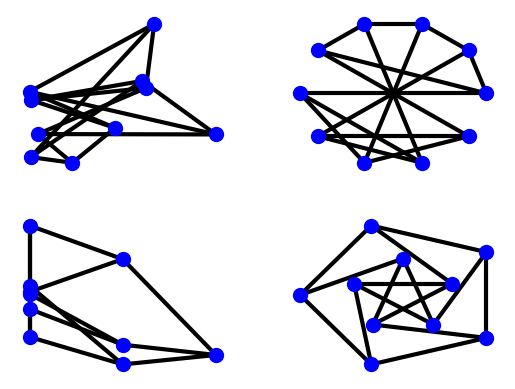

In [36]:
options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and
layouts via the `layout module`.
You can use multiple shells with `draw_shell()`.

Вы можете найти дополнительные опции через `draw_networkx()` и
макеты через модуль `layout`.
Вы можете использовать несколько оболочек с помощью `draw_shell()`.

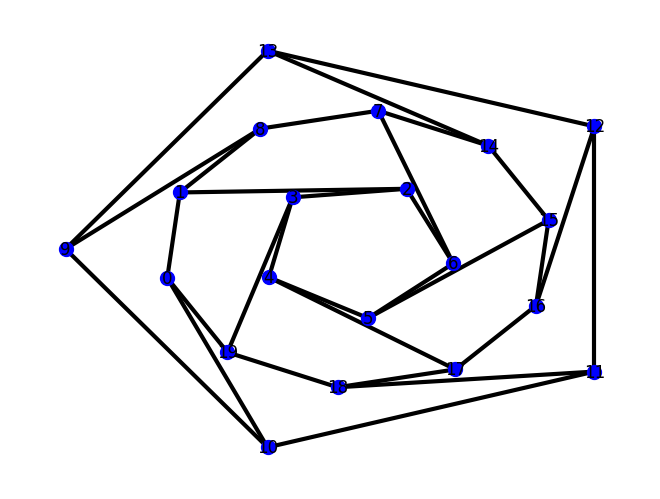

In [37]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, with_labels=True, **options)

To save drawings to a file, use, for example

Чтобы сохранить чертежи в файл, используйте, например, следующие слова

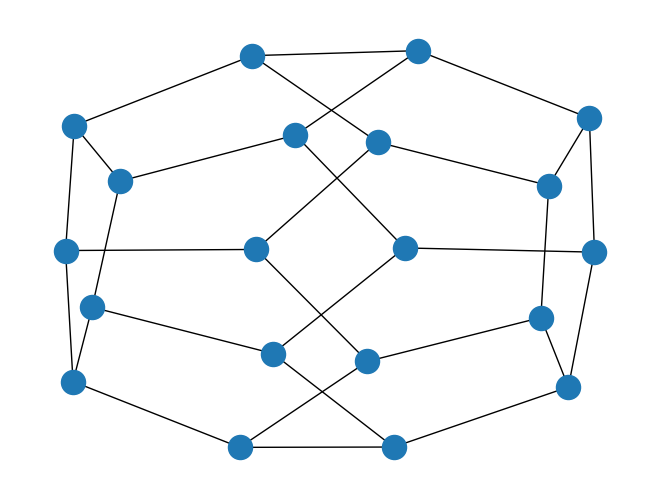

In [38]:
nx.draw(G)
plt.savefig("path.png")

This function writes to the file `path.png` in the local directory. If Graphviz and
PyGraphviz or pydot, are available on your system, you can also use
`networkx.drawing.nx_agraph.graphviz_layout` or
`networkx.drawing.nx_pydot.graphviz_layout` to get the node positions, or write
the graph in dot format for further processing.

Эта функция записывает в файл `path.png` в локальном каталоге. Если Graphviz и
PyGraphviz или pydot, доступны в вашей системе, вы также можете использовать
`networkx.drawing.nx_agraph.graphviz_layout` или
`networkx.drawing.nx_pydot.graphviz_layout` для получения положения узлов, или записать график в точечном формате.
график в точечном формате для дальнейшей обработки.

In [39]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

ImportError: requires pygraphviz http://pygraphviz.github.io/

See Drawing for additional details.

# NX-Guides

If you are interested in learning more about NetworkX, graph theory and network analysis
then you should check out [nx-guides](https://networkx.org/nx-guides/index.html). There you can find tutorials,
real-world applications and in-depth examinations of graphs and network algorithms.
All the material is official and was developed and curated by the NetworkX community.

Дополнительные сведения см. на чертеже.

# 14. X-Guides

Если вы хотите узнать больше о NetworkX, теории графов и сетевом анализе
то вам стоит заглянуть на [nx-guides](https://networkx.org/nx-guides/index.html). Там вы найдете учебные пособия,
реальные приложения и углубленное изучение графов и сетевых алгоритмов.
Все материалы являются официальными и были разработаны и курированы сообществом NetworkX.

# adjacency - смежность